# Project 1: TMDB Dataset

## Introduction

The following is an analysis of the TMDB dataset provided via Udacity for use in the Data Analyst Nanodegree. The data is also available via Kaggle. Additional descriptions can be found on the website, but the dataset consists of a csv file containing movie information collected by users of the TMDB site.  

This report includes the exploration of the general dataset and the investigation of the following 3 questions: 

    Question 1: Which genres are most common?
    
    Question 2: What were the top 10 movies of our dataset?
    
    Question 3: What are the most profitable movies?
    
    Question 4: How have profits changed?




## Data Source: https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_movies.csv


## Variables available

    id
    imdb_id
    popularity 
    budget 
    revenue 
    original_title 
    cast |
    homepage 
    director 
    tagline 
    overview 
    runtime
    genres | 
    production_companies  |
    release_date
    vote_count
    vote_average 
    release_year
    budget_adj 
    revenue_adj

Note: | indicates items are separated by pipes 

In [453]:
# Import relevant Libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Data Wrangling

### General Properties

In [454]:
#Read the CSV File in 

tmd = pd.read_csv('tmdb-movies.csv')
lendata = len(tmd['id'].unique())

print "Length of all Id's", len(tmd['id'])
print "Length of unique Id's" , lendata
print ""
print "TMD Head Starts Here " 
print "" 
print tmd.head()
                      

Length of all Id's 10866
Length of unique Id's 10865

TMD Head Starts Here 

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                    

In [455]:
print tmd.describe()



                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

Right away we can tell that part of the data is missing for budget, revenue, and runtime variables. 

Other than this, nothing seems to be completely off and there don't seem to be many outliers (though a large difference in runtime and popularity do seem to be of interest). All data seems to exists for most variables with no nulls.

We'll investigate the runtime and voting averages first then the budget/revenue data. 

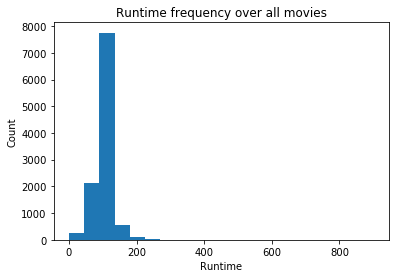

In [456]:
# What does the overall distribution of runtimes look like?
var = 'runtime'
table = tmd[var]
# plot 
ax = table.plot.hist(bins = 20 )
ax.set(title= 'Runtime frequency over all movies', xlabel= 'Runtime' , ylabel= 'Count',);


From the above we can see that most movies are under 3 hours with a few exceptions. This seems about right, but what are these exceptions? Notably, what movie is 900 minutes long? 

In [457]:
# What is the longest runtime and what movies is it? 
maxtime = tmd['runtime'].max()
maxtimeloc = tmd['runtime'].argmax()
maxtimeinfo = tmd.loc[[tmd['runtime'].argmax()]]

print "Longest Movie runtime: ", maxtime
print "Longest Movie index: ", maxtimeloc
print "Longest Movie info: " 
print ""
print maxtimeinfo
print ""


Longest Movie runtime:  900
Longest Movie index:  3894
Longest Movie info: 

          id    imdb_id  popularity  budget  revenue  \
3894  125336  tt2044056    0.006925       0        0   

                     original_title  \
3894  The Story of Film: An Odyssey   

                                                   cast  \
3894  Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...   

                                               homepage      director tagline  \
3894  http://www.channel4.com/programmes/the-story-o...  Mark Cousins     NaN   

         ...                                                overview runtime  \
3894     ...       The Story of Film: An Odyssey, written and dir...     900   

           genres production_companies release_date vote_count  vote_average  \
3894  Documentary                  NaN       9/3/11         14           9.2   

      release_year  budget_adj  revenue_adj  
3894          2011         0.0          0.0  

[1 rows x 21 columns]



From the above, we can see that the outlier film of 900 minutes was something called "The Story of Film". After some quick searching online, it looks like that's the correct runtime as it consists of 15 1-hour long segments. We can leave this as is and continue our investigation. 

Resource: 
https://en.wikipedia.org/wiki/The_Story_of_Film:_An_Odyssey



In [458]:
# What other titles have runtimes of 3 hours or more?

for num in range(len(tmd)): 
    movie = tmd.loc[num]['original_title']
    length = tmd.loc[num]['runtime']
    if length >= 180: 
        print movie, length 
        print 


Show Me a Hero 300

Childhood's End 246

The Jinx: The Life and Deaths of Robert Durst 240

Olive Kitteridge 233

Houdini 210

Ascension 282

Klondike 285

Alice 240

Emma 240

Life 500

Hamlet 185

Carlos 338

Going Postal 182

The Pillars of the Earth 421

The Pacific 540

Ben Hur 184

Never Sleep Again: The Elm Street Legacy 240

The Green Mile 189

Magnolia 188

Sunshine 181

Journey to the Center of the Earth 180

Hum Dil De Chuke Sanam 188

David Copperfield 185

Walking with Dinosaurs 180

Storm of the Century 257

Pearl Harbor 183

Band of Brothers 705

The Mists of Avalon 183

Dil Chahta Hai 183

The Blue Planet 400

The Andromeda Strain 180

The Colour of Magic 191

Jodhaa Akbar 213

Generation Kill 470

Lost in Austen 184

Ghajini 183

John Adams 501

Neverland 180

The Phantom of the Opera at the Royal Albert Hall 202

Zeitgeist: Moving Forward 201

Wonders of the Universe 240

Woody Allen: A Documentary 192

Kill Bill: The Whole Bloody Affair 247

George Harrison: Living i

From the above, we can see that many of these movies are still just over 180 minutes. After some quick searching online it looks like the longer movies are consistently series with episodes each contributing to the total. 

We can ignore these for now unless we decide that filtering out these out would be best for a more specific definition of movies. 

Now, we can look into the runtimes on the other side of the spectrum. 


In [459]:
# What movies have a runtime of zero? 

zeromins = tmd.runtime==0

print "Number of 0 length movies = ", len(tmd[zeromins])

print tmd[zeromins]

Number of 0 length movies =  31
          id    imdb_id  popularity   budget  revenue  \
92    370687  tt3608646    1.876037        0        0   
334   361931  tt5065822    0.357654        0        0   
410   339342  tt2948712    0.097514        0        0   
445   353345  tt3800796    0.218528        0        0   
486   333653  tt4058368    0.176744        0        0   
595   341051  tt2914740    0.028725        0        0   
616   325843  tt4333210    0.026797        0        0   
1241  296370  tt3024964    0.135376        0        0   
1289  286372  tt1791681    0.037459  3250000        0   
1293  286256  tt3134058    0.036904        0        0   
1849   18247  tt1212986    0.120350        0        0   
2315   48373  tt1274296    0.171615        0        0   
2370  127717  tt1525359    0.081892        0        0   
3329   20414  tt1077026    0.082898        0        0   
3794   58253  tt1588335    0.183134        0        0   
3857  289097  tt1288636    0.095583        0        0   

In [460]:
# What movies have a runtime of less than 30 mins? 

short = tmd.runtime <=30 
notzero = tmd.runtime >0 
both = tmd[short][notzero]
#print both 
print "Number of short movies <= 30 ", len(both)

print both;

Number of short movies <= 30  210
           id    imdb_id  popularity  budget  revenue  \
100    326359  tt4007502    1.724712       0        0   
216    286192  tt3824386    0.640151       0        0   
279    355338  tt4941804    0.442835       0        0   
343    366142  tt5223342    0.344994       0        0   
371    345637  tt4661600    0.422901       0        0   
456    367326  tt5184298    0.208491       0        0   
494    361671  tt5227516    0.129455       0        0   
520    327029  tt4475970    0.138353       0        0   
548    355131        NaN    0.108072       0        0   
572    365717  tt4016250    0.082569       0        0   
586    269033  tt4177746    0.070776      10        0   
594    366929  tt4781700    0.052217       0        0   
600    332479  tt4550996    0.047256       0        0   
611    303867  tt4171032    0.032678       0        0   
737    253980  tt3438640    1.375493       0        0   
825    256835  tt3473654    0.707208       0        0 

/Users/irasema/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


It looks like there are much fewer movies with less than 30 mins of runtime and even fewer with 0s for their runtime. My first thought is maybe these are values where the movie was rumored but never actually made it past production or just mistakes. However, after some brief searching, it seems that these might just be instances where someone didn't input the runtime. For those with available times but less than 30 minutes, each seem to be short films with correct data. We can remove these from the dataset, but instead let's keep these observations for the other information that is available for each. 

Resources: 
Zero length: 

https://www.imdb.com/title/tt1791681/

https://www.imdb.com/title/tt1077026/

Fewer than 30:

https://www.imdb.com/title/tt4941804/
    
Next, we'll look at the distribution and outliers for popularity. 

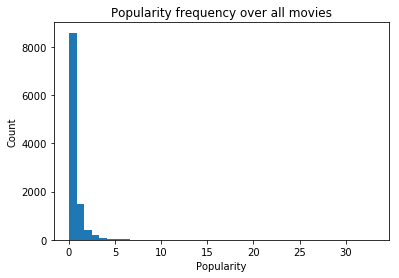

In [461]:
# What does the overall distribution of popularity look like?
var = 'popularity'
table = tmd[var]
# plot 
ax = table.plot.hist(bins = 40 )
ax.set(title= 'Popularity frequency over all movies', xlabel= 'Popularity' , ylabel= 'Count',);




In [462]:
# Popularity 
# What is the highest value for popularity and what movie is it? 
maxpop = tmd['popularity'].max()
maxpoploc = tmd['popularity'].argmax()
maxpopinfo = tmd.loc[[tmd['popularity'].argmax()]]
#maxfareticketno = maxtimeinfo['original_title'][maxtimeloc]
#someoneoverpaid = titanic[titanic['original_title'] == maxfareticketno]

print "Most popular Movie popularity: ", maxpop
print "Most popular Movie index: ", maxpoploc
print "Most popular Movie info: " 
print ""
print maxpopinfo
print ""



Most popular Movie popularity:  32.985763
Most popular Movie index:  0
Most popular Movie info: 

       id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5   

In [63]:
# What other titles have popularity of 9 or more?

for num in range(len(tmd)): 
    movie = tmd.loc[num]['original_title']
    popularity = tmd.loc[num]['popularity']
    if popularity >= 9: 
        print movie, popularity 
        print 

Jurassic World 32.985763

Mad Max: Fury Road 28.419936

Insurgent 13.112507

Star Wars: The Force Awakens 11.173103999999999

Furious 7 9.335014

The Revenant 9.1107

Interstellar 24.949134

Guardians of the Galaxy 14.311205

Captain America: The Winter Soldier 12.971027000000001

John Wick 11.422751

The Hunger Games: Mockingjay - Part 1 10.739009

The Hobbit: The Battle of the Five Armies 10.174599

Star Wars 12.037933

Avatar 9.432768

Inception 9.363643



From looking at the above, it seems that most movies have a popularity of less than 5 (sadly). Few make it above that mark but there are outliers who somehow make it past 9. At first I thought that this would be a normal 10 point scale, but after looking into this it seems TMDB has their own formula for creating these popularity scores. As such, it seems these scores aren't mistakes but very popular movies and we can move on with our investigation. 

Movie Popularity Factors: 

    Number of votes for the day
    Number of views for the day
    Number of users who marked it as a "favourite" for the day
    Number of users who added it to their "watchlist" for the day
    Release date
    Number of total votes
    Previous days score

Resources: 
https://developers.themoviedb.org/3/getting-started/popularity
https://www.themoviedb.org/talk/56e614a2c3a3685aa4008121



In [353]:
print "Least popular Movies"
print ""
notpop = tmd.popularity<=.5

print "Number of movies with popularity <.5 = ", len(tmd[notpop]) 
print tmd[notpop]



Least popular Movies

Number of movies with popularity <.5 =  6739
           id    imdb_id  popularity    budget   revenue  \
255    336313  tt2141773    0.497265         0    157768   
256    240483  tt2145829    0.486351  21000000         0   
257    321494  tt3625152    0.482422         0         0   
258    353595  tt4938416    0.477840         0         0   
259    360603  tt5133572    0.476341         0         0   
260    264337  tt3233418    0.475473         0         0   
261    289716  tt2420166    0.474788         0         0   
262    296065  tt2965466    0.474626         0         0   
263    337029  tt4086032    0.473344         0         0   
264    317952  tt4126304    0.471393         0         0   
265    325358  tt2933474    0.471091  20000000         0   
266    272548  tt2718440    0.470991         0         0   
267    340275  tt4594834    0.470124         0         0   
268    309887  tt3525346    0.467556   5300000         0   
269    302429  tt4191054    0.465

Surprisingly many not very popular movies but nothing that stands out, so we'll move on. 

Now, we can resume our investigation into the budget and revenue variables for instances with 0s for each. Is there a reason for this? Do these observations have other values missing? 


In [463]:
print "Budget Nulls"
print ""
cheap = tmd.budget==0

print "Number of 0 budget movies = ", len(tmd[cheap]) 
print tmd[cheap]


Budget Nulls

Number of 0 budget movies =  5696
           id    imdb_id  popularity  budget    revenue  \
30     280996  tt3168230    3.927333       0   29355203   
36     339527  tt1291570    3.358321       0   22354572   
72     284289  tt2911668    2.272044       0      45895   
74     347096  tt3478232    2.165433       0          0   
75     308369  tt2582496    2.141506       0          0   
88     301875  tt3289728    1.959765       0    2000000   
92     370687  tt3608646    1.876037       0          0   
95     258509  tt2974918    1.841779       0  233755553   
100    326359  tt4007502    1.724712       0          0   
101    254302  tt0462335    1.661789       0          0   
103    292040  tt3321300    1.646664       0          0   
116    297291  tt3086386    1.380320       0          0   
119     86828  tt1727770    1.360827       0    5189646   
122    277355  tt1945084    1.342839       0          0   
125    223485  tt3205376    1.329702       0     229094   
128    3

From the above, it seems that there are many movies with a budget of 0. This seems off. After a quick search, it seems that at least a few of these do have information out on their budgets (which were in fact, not 0). Since there are so many of these instances (about 1/2 of our dataset) and most seem to have other pieces of useful information (title, revenue, etc.), we should be able to keep these observations for exploratory purposes. 

Resource: 
    https://www.imdb.com/title/tt3168230/


In [464]:
print "Revenue Nulls"
print ""
broke = tmd.revenue==0

print "Number of 0 revenue movies = ", len(tmd[broke])

print tmd[broke]


Revenue Nulls

Number of 0 revenue movies =  6016
           id    imdb_id  popularity    budget  revenue  \
48     265208  tt2231253    2.932340  30000000        0   
67     334074  tt3247714    2.331636  20000000        0   
74     347096  tt3478232    2.165433         0        0   
75     308369  tt2582496    2.141506         0        0   
92     370687  tt3608646    1.876037         0        0   
93     307663  tt3480796    1.872696  10000000        0   
100    326359  tt4007502    1.724712         0        0   
101    254302  tt0462335    1.661789         0        0   
103    292040  tt3321300    1.646664         0        0   
116    297291  tt3086386    1.380320         0        0   
122    277355  tt1945084    1.342839         0        0   
133    157827  tt2217859    1.251681  11000000        0   
140    300803  tt3829170    1.144808         0        0   
143    378373  tt3532278    1.128081         0        0   
145    294963  tt2494362    1.073349   1800000        0   
147   

Again, it looks like over 1/2 our dataset has missing values for revenue. Although some of the list might be actual flops with little profit, most should have generated significant revenue. Due to the overwhelming amount of observations with missing data and the fact that other information is present within these observations, we will keep these in our dataset for now.  

Resource: 

    https://www.imdb.com/title/tt0462335/    
    https://www.imdb.com/title/tt2217859/

### Data Cleaning

From the above exploration, it seems we have missing values across several items. This is to be expected since the data comes from a community site that has crowdsourced information across various sources. However, unless we'd like to discard a good amount of our dataset (+50% in some instances), we will keep these values for now and will replace or discard them when necessary. 

For our current purpose of investigating the Dataset, we will replace all 0's with NaNs and move forward with the investigation. However, within those observations for which a variable has a missing value, other variables that are recorded will still be taken into account. i.e. if revenue is missing, we can still use the original_title and release_year values since that is still likely to be accurate. 


In [465]:
#Replace any 0's with NaN's 
exists = tmd > 0
tmd = tmd[exists]

# Data Exploration: 

## General Exploration

In [466]:
#First, let's get some information for the data we have 
tmd.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,20669.000000,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,75610.000000,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [467]:
#Which variables are correlated?
tmd[exists].corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.075766,-0.040843,-0.078771,-0.035551,-0.058363,0.511364,-0.163044,-0.115445
popularity,-0.014350,1.000000,0.479958,0.629316,0.136901,0.800828,0.209511,0.089801,0.435341,0.561760
budget,-0.075766,0.479958,1.000000,0.688548,0.265416,0.580043,0.092007,0.215388,0.959131,0.533497
revenue,-0.040843,0.629316,0.688548,1.000000,0.237811,0.764122,0.206958,0.121289,0.657577,0.905011
runtime,-0.078771,0.136901,0.265416,0.237811,1.000000,0.162607,0.154798,-0.112271,0.329267,0.263979
vote_count,-0.035551,0.800828,0.580043,0.764122,0.162607,1.000000,0.253823,0.107948,0.523479,0.666509
vote_average,-0.058363,0.209511,0.092007,0.206958,0.154798,0.253823,1.000000,-0.117632,0.112248,0.242429
release_year,0.511364,0.089801,0.215388,0.121289,-0.112271,0.107948,-0.117632,1.000000,0.036619,-0.099530
budget_adj,-0.163044,0.435341,0.959131,0.657577,0.329267,0.523479,0.112248,0.036619,1.000000,0.570466
revenue_adj,-0.115445,0.561760,0.533497,0.905011,0.263979,0.666509,0.242429,-0.099530,0.570466,1.000000


Note:
-  Popularity is positively correlated with budget, revenue, vote_count, and vote_average. 

-  Budget is positively correlated with revenue, runtime, vote_count, and release_year. 

-  Revenue is positively correlated with runtime, vote_count, and vote_average.

-  Vote_average is positively correlated with popularity, revenue, and vote_count.

-  Vote_count is positively correlated with popularity, budget, revenue, and vote_average.

-  Release_year is positively correlated with budget. 




## Question 1: Which genres are most common?

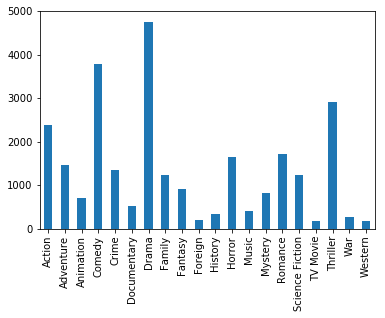

In [470]:
genres = tmdb['genres']

#Now we'll create a grid of dummy variables
dummies_genres = genres.str.get_dummies(sep="|")

#Now let's plot the counts of each genre
dummies_genres.sum().plot(kind = 'bar');

From the above, it seems that Drama, Comedy, and Thrillers are the top 3 most common genres. This makes sense, as these are probably the most broad categories. 

## Question 2: What were the top 10 movies of our dataset?


This is an interesting question to investigate. What really makes a movie great? Personally, I'd like to know what the top movies are by popularity and voting average. We'll see if any overlap. 

In [471]:
# What were the top 10 movies? 

#First, let's gather the top 10 by both popularity and vote_average
top_pop = tmd.nlargest(10, 'popularity')
top_score = tmd.nlargest(10, 'vote_average')

#Now let's print each out to see what the titles are 
print "Top 10 Popularity"
print top_pop['original_title']
print ""
print "Top 10 Voting Score"
print top_score['original_title']


Top 10 Popularity
0                              Jurassic World
1                          Mad Max: Fury Road
629                              Interstellar
630                   Guardians of the Galaxy
2                                   Insurgent
631       Captain America: The Winter Soldier
1329                                Star Wars
632                                 John Wick
3                Star Wars: The Force Awakens
633     The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object

Top 10 Voting Score
3894                        The Story of Film: An Odyssey
538                                  The Mask You Live In
1200                        Black Mirror: White Christmas
2269                                          Life Cycles
6911                                    Pink Floyd: Pulse
2401      Opeth: In Live Concert At The Royal Albert Hall
3224    John Mayer: Where the Light Is Live in Los Ang...
3690                                    The Art of Flight
5

It looks like the two lists don't overlap at all. Let's look into their corresponding scores. 

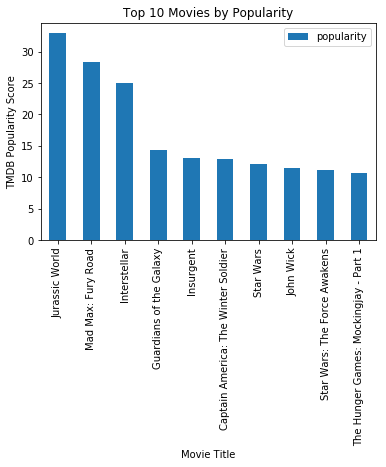

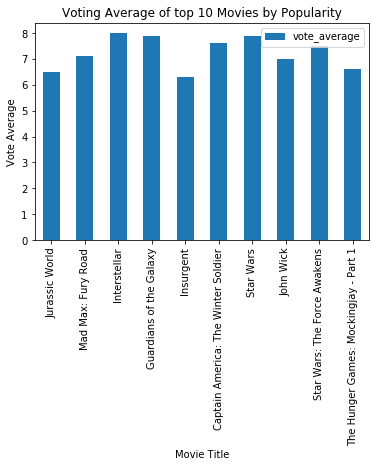

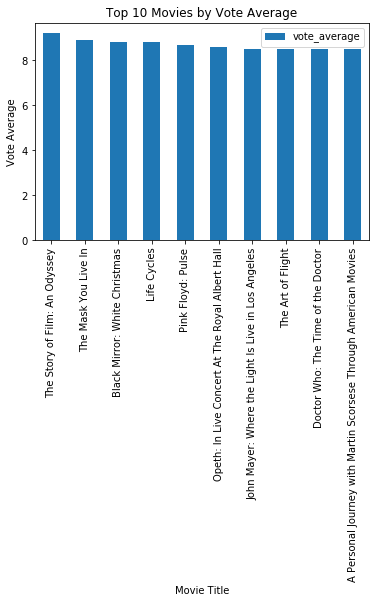

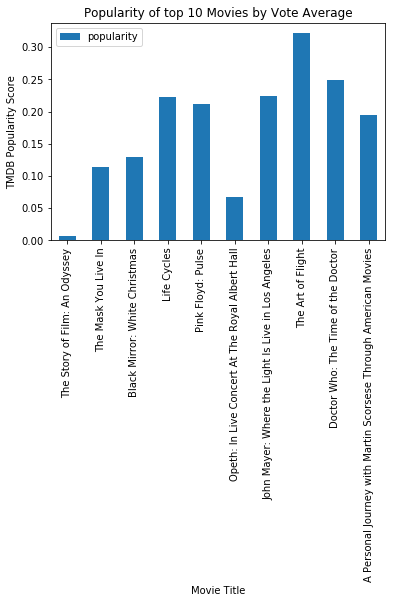

In [472]:
# Now let's see what their corresponding scores were in a few visualizations

#Plot the top 10 by Popularity 
plot1 = top_pop.plot(x = 'original_title', y = 'popularity', kind = 'bar', 
                    title = 'Top 10 Movies by Popularity')
plot1.set_xlabel('Movie Title')
plot1.set_ylabel('TMDB Popularity Score')

#Plot the top 10 by Popularity but show their Voting Average
plot4 = top_pop.plot(x = 'original_title', y = 'vote_average', kind = 'bar', 
                    title = 'Voting Average of top 10 Movies by Popularity')
plot4.set_xlabel('Movie Title')
plot4.set_ylabel('Vote Average')


#Plot the top 10 by Vote 
plot2 = top_score.plot(x = 'original_title', y = 'vote_average', kind = 'bar',
                      title = 'Top 10 Movies by Vote Average')
plot2.set_xlabel('Movie Title')
plot2.set_ylabel('Vote Average')

#Plot the top 10 by Vote but show their popularity 
plot3 = top_score.plot(x = 'original_title', y = 'popularity', kind = 'bar', 
                      title = 'Popularity of top 10 Movies by Vote Average')
plot3.set_xlabel('Movie Title')
plot3.set_ylabel('TMDB Popularity Score')



This seems interesting. It looks like the top 10 by popularity all have reasonably high voting averages but none really break the 9 point mark, even the most popular title "Jurassic World". 

However, the top 10 by Vote Average seem to all have scores of 8 or above by votes, but none of the top 10 even break a popularity score of 1. Since the distribution of popularity scores is skewed left, this seems reasonable but still surprising. 

## Question 3: What are the most profitable movies?


In [473]:
#Here I'll create an additional column to see movie profits

#First we need the adjusted revenues
arevenue = tmd['revenue_adj']
#Then the adjusted budgets 
abudget = tmd['budget_adj']
#Now we'll create the profit from the two 
aprofit = arevenue - abudget
#Now we'll add the profit as an additional column
tmd['profit_adj'] = aprofit 
#tmd.head()

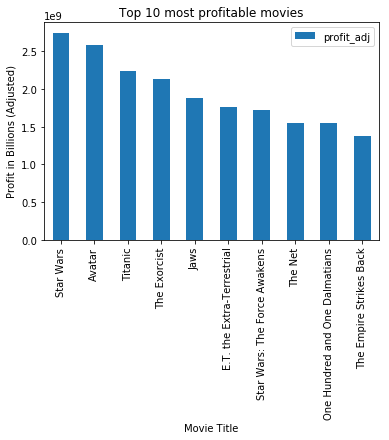

In [474]:
# Top 10 most profitable movies 
topprofit = tmd.nlargest(10, 'profit_adj')
plot5 = topprofit.plot(x = 'original_title', y = 'profit_adj', kind = 'bar', 
                    title = 'Top 10 most profitable movies')
plot5.set_xlabel('Movie Title')
plot5.set_ylabel('Profit in Billions (Adjusted)');



Again some surprise. It looks like the top 10 by profit actually have a very nice variation. Surprisingly, the most profitable movies aren't all filled with newer movies. Maybe this has something to do with whether or not revenue is cumulative, or maybe this just means newer movies spend more (relatively) on production costs that detract from their profit.  

## Question 4: How have profits changed?

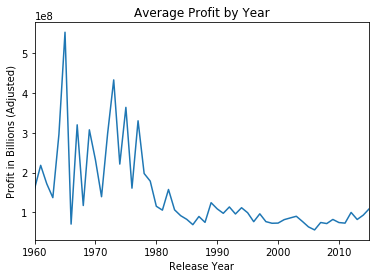

In [475]:
# How has average profit changed year over year?

#Find the average profit for each year 
avgprofitbyyear = tmd.groupby('release_year').mean()['profit_adj']

pplot = avgprofitbyyear.plot(title = 'Average Profit by Year')

pplot.set_xlabel('Release Year')
pplot.set_ylabel('Profit in Billions (Adjusted)');



Oddly enough, it looks like the average profit has gone down over the years. I imagine the initial spikes are caused by a lack of data from the 60s-80s, but this is still surprising. Even then, it might just be that there were much fewer choices on which movie to see. 

count    10866.000000
mean      2001.322658
std         12.812941
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64



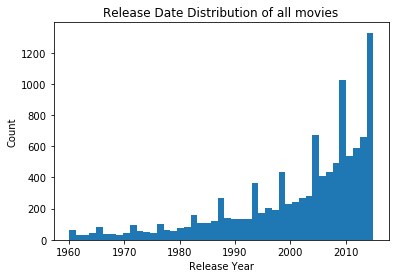

In [476]:
# What does the distribution of years look like 

print tmd['release_year'].describe();
print ""

table = tmd['release_year'];
# plot 
ax = table.plot.hist(bins = 45 );
ax.set(title= 'Release Date Distribution of all movies', xlabel='Release Year', ylabel= 'Count',);




It looks like movie production has gone up in recent years with some interesting spikes every now and then. I would have imagined the profits have also risen year over year as well, but with growth like this the average might not be a great indicator for the industry as a whole. 

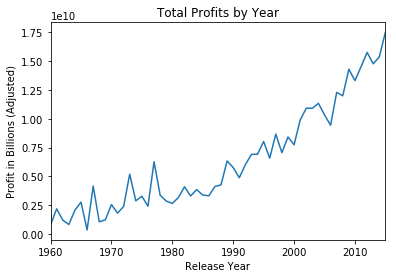

In [477]:
# How have overall profits changed year over year?

sumprofitbyyear = tmd.groupby('release_year').sum()['profit_adj']

sumplot = sumprofitbyyear.plot(title = 'Total Profits by Year')

sumplot.set_xlabel('Release Year')
sumplot.set_ylabel('Profit in Billions (Adjusted)');




And now this looks about right. With a huge increase in total movies per year, the overall profits have increased as well. 

# Conclusion 

After initially exploring our dataset, we discovered that our data was a bit spotty for certain variables such as revenue, budget, runtime, and vote_average. This is to be expected with the source being a community of crowdsourced movie information. Upon further investigation, it seemed that while some variables might be missing or incorrect, other variables within the same observation were fine and could contribute to other analyses. There were no major errors in the data that prompted removal at this stage. Outliers did exist, but we chose to leave them in the dataset for the information they might offer. We chose to remove missing values and replace them with 'NaN' to prevent any mixup. By no means did we fully explore or clean this dataset. Additional errors and outliers may exist. Further exploration was done to explore the questions raised, not for prediction or to establish cause/effect relationships. 

After our initial exploration, we decided to pose a few questions: 

    Question 1: Which genres are most common?
    Question 2: What were the top 10 movies of our dataset?
    Question 3: What are the most profitable movies?
    Question 4: How have profits changed?

In conclusion to my data exploration: 
    
    Question 1: Which genres are most common?
    -  Dramas are the most popular genre, followed by comedies and thrillers. In hindsight, this doesn't come as much of a surprise since genres are often overlapping within movies and these are some of the most general. 
    
    Question 2: What were the top 10 movies of our dataset?
    -  The top 10 movies varied depending on criteria. The top 10 most popular did not overlap with the top by vote_average. If picking a movie and looking for something like a hidden gem, I'd look to the vote_average. 
    
    Question 3: What are the most profitable movies?
    -  The most profitable movies varied widely with a few being from recent years but most being classics that have a franchise surrounding them. 
    
    Question 4: How have profits changed?
    -  Total profits have risen drastically, but so have the number of films being produced, watering down the average profits such that they have actually decreased (according to our limited dataset at least). 

Again, our dataset was great but fairly limited. We only have data on movies for which people have contributed, and even then they may not always include the correct information. While I kept my exploration very basic, there still may be other factors that would throw off results. If any more comprehensive analysis is to be done, the dataset would need to be cleaned more thoroughly and tailored specifically to whatever questions one would explore (ex: movie trends specifically concerning films over an hour long, under 4 hours, and with a budget within a given range). 


# Resources: 


https://stackoverflow.com/

https://measuringu.com/handle-missing-data/

https://www.quora.com/How-do-you-handle-missing-data-statistics-What-imputation-techniques-do-you-recommend-or-follow

https://pandas.pydata.org/pandas-docs/stable/missing_data.html

https://pandas.pydata.org/

https://plot.ly/matplotlib/bar-charts/

https://matplotlib.org/

https://stackoverflow.com/questions/15315452/selecting-with-complex-criteria-from-pandas-dataframe

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html

https://www.ibm.com/support/knowledgecenter/SSQNUZ_current/com.ibm.icpdata.doc/dsx/markd-jupyter.html

https://github.com/JuzerShakir/Investigate_TMDb_Movies/blob/master/report.ipynb

https://github.com/divyachandramouli/Investigate_TMDb_Movie_Dataset/blob/master/DC_Investigate_TMDb_movie_dataset.ipynb

https://knowledge.udacity.com/questions/9994


